<a href="https://colab.research.google.com/github/danielsimbarashemudhombozi/Django-myproject/blob/main/train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:

import tensorflow as tf
import tensorflow_datasets as tfds
import os
import json
import matplotlib.pyplot as plt
import numpy as np
import string, random
import pandas as pd

In [6]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

prjectName = 'beans'
def retrive_data():
    test_ds, info = tfds.load(prjectName, split='test', as_supervised=True, with_info=True, shuffle_files=True)
    print(info)
    # to see labels
    print(f'Classes:{info.features["label"].names}')
    # show the shape
    print(test_ds.element_spec)
    return test_ds, info

def get_training_data():
    validation_data = tfds.load(prjectName, split=f'validation', as_supervised=True)
    training_data = tfds.load(prjectName, split=f'train', as_supervised=True)
    return training_data, validation_data

In [7]:
def wrangle_data_GenPlus(dataset, split, batch_size=32):
    wrangled = dataset.map(lambda img, lbl: (tf.cast(img,tf.float32)/255.0,lbl))
    if split == 'train':
        features = np.array([x[0] for x in wrangled])
        lables = np.array([x[1] for x in wrangled])
        train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
            horizontal_flip=True,
            zoom_range = 0.2,
            rotation_range=20,
            fill_mode='nearest'
        )
        wrangled = train_data_gen.flow(features, lables,batch_size=batch_size)
    elif split in ('valid','test' ) : # Caches the elements in this dataset. loat it into the memory to go faster
        wrangled = wrangled.cache()
        wrangled = wrangled.batch(batch_size)  # Combines consecutive elements of this dataset into batches.
        wrangled = wrangled.prefetch(tf.data.AUTOTUNE)
    return wrangled

In [4]:
def compileModel(model):
    model.compile(optimizer=tf.keras.optimizers.Adam(),
                  loss=tf.keras.losses.sparse_categorical_crossentropy,
                  # classification with integer encoded labels use "scce"
                  metrics=['accuracy'])
    print(model.summary())
    return model


In [8]:

def myFullCNN():
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer((500, 500, 3)),
        tf.keras.layers.Resizing(125,125),
        tf.keras.layers.Conv2D(64, 3, activation=tf.keras.activations.relu),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Conv2D(64, 3, activation=tf.keras.activations.relu),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Conv2D(128, 3, activation=tf.keras.activations.relu),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Conv2D(128, 3, activation=tf.keras.activations.relu),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Conv2D(128, 3, activation=tf.keras.activations.relu),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(128, activation=tf.keras.activations.relu),
        tf.keras.layers.Dense(3, activation=tf.keras.activations.softmax)
    ], name='cnn_model')
    return compileModel(model)




In [15]:

# prepare the data
test_ds, info = retrive_data()
train_ds, valid_ds = get_training_data()



batch_size = 64
train_data = wrangle_data_GenPlus(train_ds, 'train', batch_size=batch_size)
valid_data = wrangle_data_GenPlus(valid_ds, 'valid', batch_size=batch_size)
test_data = wrangle_data_GenPlus(test_ds, 'test', batch_size=batch_size)

# advancedCNN
model = myFullCNN()




Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1034 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/incomplete.SQRENT_0.1.0/beans-train.tfrecord*...:   0%|          | 0…

Generating validation examples...:   0%|          | 0/133 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/incomplete.SQRENT_0.1.0/beans-validation.tfrecord*...:   0%|        …

Generating test examples...:   0%|          | 0/128 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/beans/incomplete.SQRENT_0.1.0/beans-test.tfrecord*...:   0%|          | 0/…

Dataset beans downloaded and prepared to /root/tensorflow_datasets/beans/0.1.0. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='beans',
    full_name='beans/0.1.0',
    description="""
    Beans is a dataset of images of beans taken in the field using smartphone
    cameras. It consists of 3 classes: 2 disease classes and the healthy class.
    Diseases depicted include Angular Leaf Spot and Bean Rust. Data was annotated by
    experts from the National Crops Resources Research Institute (NaCRRI) in Uganda
    and collected by the Makerere AI research lab.
    """,
    homepage='https://github.com/AI-Lab-Makerere/ibean/',
    data_dir=PosixGPath('/tmp/tmpyfahqzdmtfds'),
    file_format=tfrecord,
    download_size=Unknown size,
    dataset_size=171.63 MiB,
    features=FeaturesDict({
        'image': Image(shape=(500, 500, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),
    supervised_keys=('image', 'label'),
    disab

Model: "cnn_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing (Resizing)                  │ (None, 125, 125, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 123, 123, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 61, 61, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 59, 59, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 29, 29, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 27, 27, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 3, 3, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 474,051 (1.81 MB)

 Trainable params: 474,051 (1.81 MB)

 Non-trainable params: 0 (0.00 B)

None


In [10]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Epoch 1/70
17/17 ━━━━━━━━━━━━━━━━━━━━ 107s 6s/step - accuracy: 0.9508 - loss: 0.1334 - val_accuracy: 0.9474 - val_loss: 0.1709
Epoch 2/70
17/17 ━━━━━━━━━━━━━━━━━━━━ 116s 7s/step - accuracy: 0.9454 - loss: 0.1308 - val_accuracy: 0.9323 - val_loss: 0.1869
Epoch 3/70
17/17 ━━━━━━━━━━━━━━━━━━━━ 114s 7s/step - accuracy: 0.9683 - loss: 0.1026 - val_accuracy: 0.9248 - val_loss: 0.2256
Epoch 4/70
17/17 ━━━━━━━━━━━━━━━━━━━━ 118s 7s/step - accuracy: 0.9592 - loss: 0.1227 - val_accuracy: 0.8947 - val_loss: 0.2540
Epoch 5/70
17/17 ━━━━━━━━━━━━━━━━━━━━ 119s 7s/step - accuracy: 0.9535 - loss: 0.1307 - val_accuracy: 0.8421 - val_loss: 0.5320
Epoch 6/70
17/17 ━━━━━━━━━━━━━━━━━━━━ 120s 7s/step - accuracy: 0.9375 - loss: 0.1711 - val_accuracy: 0.8947 - val_loss: 0.3407
Epoch 7/70
17/17 ━━━━━━━━━━━━━━━━━━━━ 120s 7s/step - accuracy: 0.9574 - loss: 0.1236 - val_accuracy: 0.9098 - val_loss: 0.2183
Epoch 8/70
17/17 ━━━━━━━━━━━━━━━━━━━━ 121s 7s/step - accuracy: 0.9645 - loss: 0.1017 - val_accuracy: 0.9323 - v

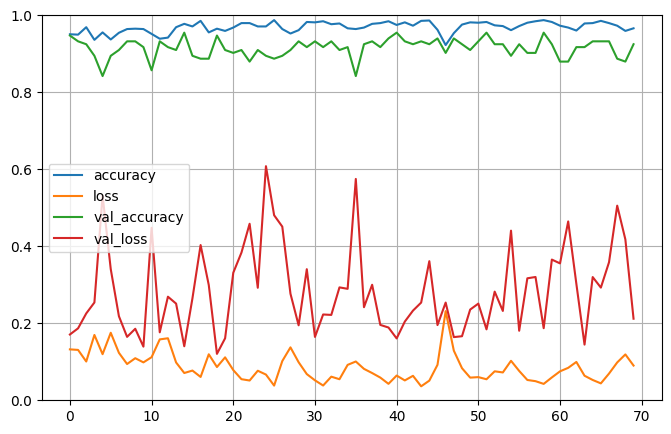

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 806ms/step - accuracy: 0.9062 - loss: 0.3402
[0.30147457122802734, 0.9140625]


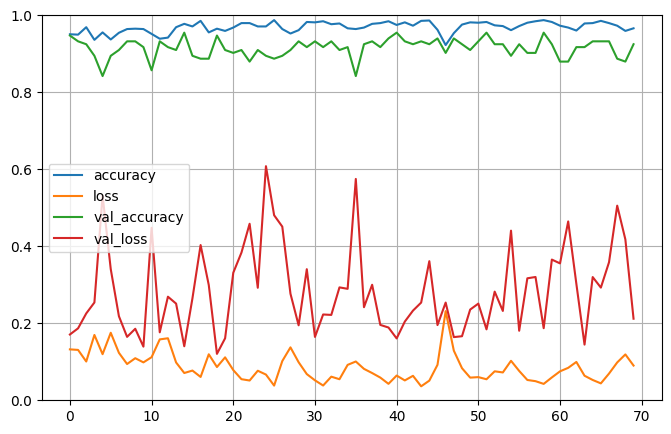

In [8]:
# fit the model
History = model.fit(train_data, validation_data=valid_data, epochs=70)

def plot_History(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

    # Now you can call plot_History safely
plot_History(History)
print(model.evaluate(test_data))

plot_History(History)

In [16]:
model.save("legumebeans.keras")

In [17]:
import tensorflow as tf

# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('legumebeans.tflite', 'wb') as f:
  f.write(tflite_model)

Saved artifact at '/tmp/tmpj_4vlzyw'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 500, 500, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  133396116730128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133396116732432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133396116733200: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133396116731088: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133396116733584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133396116733392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133396116726672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133396116733776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133396116732816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133396116733008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13339611657038